In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 16s 60ms/step - loss: 0.2932 - accuracy: 0.9104 - val_loss: 0.1636 - val_accuracy: 0.9472
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1002 - accuracy: 0.9691 - val_loss: 0.1133 - val_accuracy: 0.9623
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.0671 - val_accuracy: 0.9793
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0916 - val_accuracy: 0.9726
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0746 - val_accuracy: 0.9767
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0604 - val_accuracy: 0.9825
Epoch 7/10
235/235 [==============================] - 5s 21ms/s

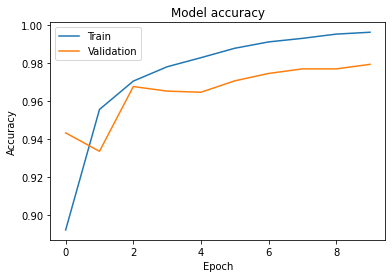

In [ ]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

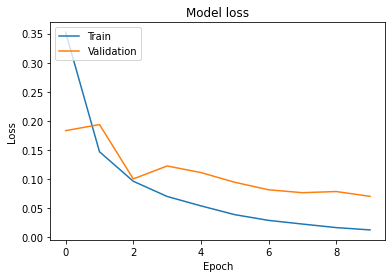

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

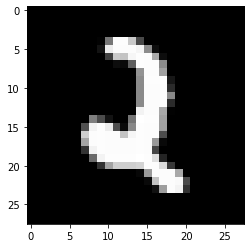

1/1 [==============================] - 0s 26ms/step
The image is predicted as: 2


In [ ]:
# Select a random image from the test data
idx = np.random.randint(0, test_images.shape[0])
img = test_images[idx]

# Plot the selected image
plt.imshow(img, cmap='gray')
plt.show()

input_image = img.reshape(1, 784).astype('float32') / 255.0

prediction = model.predict(input_image)
print('The image is predicted as:', np.argmax(prediction))

In [ ]:
#creating network
model_upd = Sequential()
model_upd.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_upd.add(Dense(512, activation='tanh'))
model_upd.add(Dense(256, activation='tanh'))
model_upd.add(Dense(128, activation='tanh'))
model_upd.add(Dense(10, activation='softmax'))

model_upd.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_upd.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 10s 41ms/step - loss: 0.3548 - accuracy: 0.8903 - val_loss: 0.1926 - val_accuracy: 0.9444
Epoch 2/10
235/235 [==============================] - 8s 36ms/step - loss: 0.1455 - accuracy: 0.9558 - val_loss: 0.1749 - val_accuracy: 0.9456
Epoch 3/10
235/235 [==============================] - 10s 42ms/step - loss: 0.0980 - accuracy: 0.9694 - val_loss: 0.1277 - val_accuracy: 0.9602
Epoch 4/10
235/235 [==============================] - 10s 42ms/step - loss: 0.0705 - accuracy: 0.9779 - val_loss: 0.2338 - val_accuracy: 0.9230
Epoch 5/10
235/235 [==============================] - 9s 36ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0902 - val_accuracy: 0.9726
Epoch 6/10
235/235 [==============================] - 10s 42ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.1559 - val_accuracy: 0.9531
Epoch 7/10
235/235 [==============================] - 10s 42ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.1162 - val_accuracy: 0